# Morphological Associative memories

In [1]:
# dependencies
import matplotlib.pyplot as plt
import pickle
import numpy as np

In [2]:
f = open('final_dataset.pickle','rb')
dataset = pickle.load(f)

2


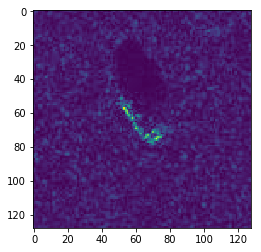

In [3]:
sample_image = dataset['train_dataset'][0]
sample_label = dataset['train_labels'][0]
print(sample_label)
plt.figure()
plt.imshow(sample_image)
plt.show()

In [4]:
# lets make Wxx and Mxx for this images
# Wxx
x = np.array([0,0,0])
y = np.array([0,1,0])
final = np.subtract.outer(y,x)
print(final)

[[0 0 0]
 [1 1 1]
 [0 0 0]]


In [36]:
# 1. flatten the whole image into n-pixels
x_vectors = sample_image.flatten()
# dimensions must be of the form img_len,1
# for this x_vector the weights must be of the order 1,num_perceptrons
# but this gives me a sparse matrix of the order img_len,num_perceptrons
# what we do here is take sum row wise we will get like  [1,0,0,1] will become [2]
# and therefore we will have outputs as img_len,1

# so here to get the weights for x_vectors we have to multiply matrices of the order
# img_len,1 and 1,img_len 

In [37]:
#x_vectors = np.array([1,2,5,1])
weights = np.subtract.outer(x_vectors, x_vectors)
print(weights)

[[ 0.         -0.07843137 -0.04705882 ..., -0.00784314  0.03921568
   0.02745098]
 [ 0.07843137  0.          0.03137255 ...,  0.07058823  0.11764705
   0.10588235]
 [ 0.04705882 -0.03137255  0.         ...,  0.03921568  0.0862745
   0.0745098 ]
 ..., 
 [ 0.00784314 -0.07058823 -0.03921568 ...,  0.          0.04705882
   0.03529412]
 [-0.03921568 -0.11764705 -0.0862745  ..., -0.04705882  0.         -0.01176471]
 [-0.02745098 -0.10588235 -0.0745098  ..., -0.03529412  0.01176471  0.        ]]


In [39]:
add_individual = np.add(weights, x_vectors)
# pg-6 now perform row wise max
result = [max(row) for row in add_individual]
np.testing.assert_array_almost_equal(x_vectors, result)
print('done')
# for k=1 dimesions of Mxx and Wxx are same

done


Now lets add some erosive noise to the image and then lets see the recall

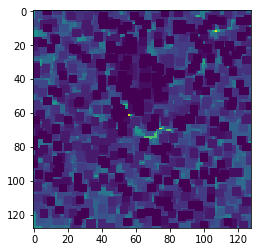

In [41]:
import cv2

erode_img = sample_image
# kernel is a pixel set like a cross( or any shape) which convolves and erodes
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(erode_img,kernel,iterations = 1)
plt.figure()
plt.imshow(erosion)
plt.show()

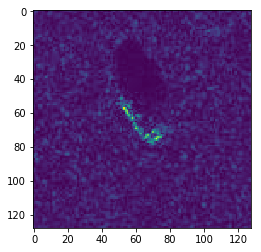

In [47]:
# Now lets try to do some recall
x_eroded = erosion
x_eroded_vector = x_eroded.flatten()

add_individual = np.add(weights, x_eroded_vector)
result = np.array([max(row) for row in add_individual])
# now lets reshape the result to 128 x 128
result.shape = (128, 128)
plt.figure()
plt.imshow(result)
plt.show()

In [50]:
# now lets see the amount of recall error
result = result.flatten()
np.testing.assert_array_almost_equal(result, x_vectors)
print('done 0%')

done 0%


**Further investigation will be done on obtaining kernel matrix and creating a Neural Network**